# Etude des relations picks ban

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
%matplotlib inline


In [2]:

path_kills = "../../Data/DataRework/set_killsClassChamp.csv"
path_ban = "../../Data/DataRaw/set_bans.csv"
path_infoMatch = "../../Data/DataRaw/set_matchInfo.csv"
path_date = "../../Data/DataRework/set_addressDate.csv"



In [3]:

df_kills = pd.read_csv(path_kills)
df_bans = pd.read_csv(path_ban)
df_infoMatch = pd.read_csv(path_infoMatch)
df_date = pd.read_csv(path_date)

#Add date to bans
df_bans = df_bans.merge(right=df_date, right_on="Address", left_on="Address", how="left")
# Set the datetime columns
df_bans.Date = pd.to_datetime(df_bans.Date)


In [4]:

df_kills.head()
#prendre le nombre de kills par champions par partie


,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,Date,ChampionsKiller,PrimaryClass,SecondaryClass
0,http://matchhistory.na.leagueoflegends.com/en/...,bKills,10.820,C9 Hai,TSM Bjergsen,NaN,NaN,NaN,NaN,9229,8469,2015-01-24,ahri,Burst,NaN
1,http://matchhistory.na.leagueoflegends.com/en/...,bKills,16.286,C9 LemonNation,TSM WildTurtle,TSM Santorin,TSM Bjergsen,TSM Lustboy,NaN,13908,5960,2015-01-24,jinx,Marksman,NaN
2,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.733,C9 Hai,TSM Bjergsen,TSM Santorin,TSM WildTurtle,TSM Lustboy,NaN,8281,7889,2015-01-24,ahri,Burst,NaN
3,http://matchhistory.na.leagueoflegends.com/en/...,bKills,18.880,C9 Meteos,TSM Dyrus,TSM Santorin,TSM Bjergsen,TSM WildTurtle,TSM Lustboy,8522,8895,2015-01-24,irelia,Diver,NaN
4,http://matchhistory.na.leagueoflegends.com/en/...,bKills,27.005,C9 Balls,TSM Bjergsen,TSM Dyrus,TSM Santorin,TSM WildTurtle,TSM Lustboy,8902,7643,2015-01-24,ahri,Burst,NaN


In [5]:

df_bans.head()
#Prendre liste champ bannie par partie.


,Address,Team,ban_1,ban_2,ban_3,ban_4,ban_5,Date
0,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Rumble,Kassadin,Lissandra,NaN,NaN,2015-01-24
1,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Kassadin,Sivir,Lissandra,NaN,NaN,2015-01-24
2,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,JarvanIV,Lissandra,Kassadin,NaN,NaN,2015-01-25
3,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Annie,Lissandra,Kassadin,NaN,NaN,2015-01-25
4,http://matchhistory.na.leagueoflegends.com/en/...,blueBans,Irelia,Pantheon,Kassadin,NaN,NaN,2015-01-25


In [6]:

df_infoMatch.head()
#Recupere les pick par match



,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,...,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,...,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,...,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,...,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,...,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...


In [7]:
df_tempo = pd.DataFrame({"Address":[],"Ban":[]})

# for i, row in df_bans.iterrows():
#         a = {"Address":row["Address"],"Ban": [row["ban_1"],row["ban_2"],row["ban_3"], row["ban_4"], row["ban_5"]]}
#        # b = {"Address":row["Address"],"Ban": row["ban_2"]}        
#        # c = {"Address":row["Address"],"Ban": row["ban_3"]}        
#        # d = {"Address":row["Address"],"Ban": row["ban_4"]}        
#        # e = {"Address":row["Address"],"Ban": row["ban_5"]}
        
#         df_tempo = df_tempo.append(a, ignore_index=True)
#        # df_tempo = df_tempo.append(b, ignore_index=True)        
#        # df_tempo = df_tempo.append(c, ignore_index=True)        
#        # df_tempo = df_tempo.append(d, ignore_index=True)        
#        # df_tempo = df_tempo.append(e, ignore_index=True)
        
for i in df_bans.Address:
    match = df_bans.iloc[df_bans[df_bans.Address == i].index]
    
    blue = match[match.Team == "blueBans"]
    red = match[match.Team == "redBans"]
    
    a = {"Address":i,"Ban": [blue["ban_1"].values[0],blue["ban_2"].values[0],
                                            blue["ban_3"].values[0], blue["ban_4"].values[0], blue["ban_5"].values[0],red["ban_1"].values[0],
                                            red["ban_2"].values[0],red["ban_3"].values[0], red["ban_4"].values[0], red["ban_5"].values[0]]}
    df_tempo = df_tempo.append(a, ignore_index=True)

In [8]:
df_tempo

,Address,Ban
0,http://matchhistory.na.leagueoflegends.com/en/...,"[Rumble, Kassadin, Lissandra, nan, nan, Trista..."
1,http://matchhistory.na.leagueoflegends.com/en/...,"[Kassadin, Sivir, Lissandra, nan, nan, RekSai,..."
2,http://matchhistory.na.leagueoflegends.com/en/...,"[JarvanIV, Lissandra, Kassadin, nan, nan, Lebl..."
3,http://matchhistory.na.leagueoflegends.com/en/...,"[Annie, Lissandra, Kassadin, nan, nan, RekSai,..."
4,http://matchhistory.na.leagueoflegends.com/en/...,"[Irelia, Pantheon, Kassadin, nan, nan, Rumble,..."
...,...,...
15235,https://matchhistory.euw.leagueoflegends.com/e...,"[Ezreal, Sejuani, Azir, Cassiopeia, Corki, Orn..."
15236,https://matchhistory.euw.leagueoflegends.com/e...,"[Gangplank, Sejuani, Azir, Gnar, Zac, Zoe, Kog..."
15237,https://matchhistory.na.leagueoflegends.com/en...,"[TahmKench, KogMaw, Shen, Sejuani, Shyvana, Az..."
15238,https://matchhistory.na.leagueoflegends.com/en...,"[KogMaw, Illaoi, Urgot, Xerath, Karma, Kalista..."


In [9]:
df_infoMatch.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'blueTop', 'blueTopChamp', 'blueJungle',
       'blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC',
       'blueADCChamp', 'blueSupport', 'blueSupportChamp', 'redTop',
       'redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle',
       'redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport',
       'redSupportChamp', 'Address'],
      dtype='object')

In [10]:
df_infoMatch

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,Dyrus,...,Gnar,Meteos,Elise,Hai,Fizz,Sneaky,Sivir,LemonNation,Thresh,http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,Cris,...,Irelia,Crumbzz,JarvanIV,Shiphtur,Azir,CoreJJ,Corki,KiWiKiD,Annie,http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,Flaresz,...,Sion,Saintvicious,LeeSin,Keane,Azir,Cop,Corki,BunnyFuFuu,Janna,http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,Rhux,...,Gnar,IWDominate,Nunu,Fenix,Lulu,KEITH,KogMaw,Xpecial,Janna,http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,Benny,...,Sion,Porpoise8,RekSai,Slooshi8,Lulu,Maplestreet8,Corki,Dodo8,Annie,http://matchhistory.na.leagueoflegends.com/en/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7615,TCL,2018,Spring,Season,YC,0,1,SUP,34,Elwind,...,Chogath,Stomaged,XinZhao,GBM,Veigar,Zeitnot,Xayah,SnowFlower,Rakan,https://matchhistory.euw.leagueoflegends.com/e...
7616,TCL,2018,Spring,Season,GAL,0,1,DP,39,Rare,...,Chogath,KaKAO,Ivern,Lucete,Ryze,Ruvelius,Caitlyn,Japone,Braum,https://matchhistory.euw.leagueoflegends.com/e...
7617,OPL,2018,Spring,Season,SIN,0,1,DW,24,Praedyth,...,Gangplank,Praelus,Evelynn,Triple,Malzahar,k1ng,Ezreal,Cupcake,Taric,https://matchhistory.na.leagueoflegends.com/en...
7618,OPL,2018,Spring,Season,LGC,1,0,TTC,35,Ceres,...,Gangplank,Swathe,JarvanIV,Shok,Veigar,Low,Sivir,Tilting,Janna,https://matchhistory.na.leagueoflegends.com/en...


In [11]:
df_tempo_pick = pd.DataFrame({"Address":[],"pick":[]})

for i, row in df_infoMatch.iterrows():
        a = {"Address":row["Address"],"pick": [row["blueTopChamp"],row["blueJungleChamp"],row["blueMiddleChamp"], row["blueMiddleChamp"], row["blueADCChamp"], row["blueSupportChamp"],
                                               row["redTopChamp"], row["redJungleChamp"], row["redMiddleChamp"], row["redMiddleChamp"], row["redADCChamp"], row["redSupportChamp"]]}
             
#         b = {"Address":row["Address"],"pick": row["blueJungleChamp"]}        
#         c = {"Address":row["Address"],"pick": row["blueMiddleChamp"]}        
#         d = {"Address":row["Address"],"pick": row["blueMiddleChamp"]}        
#         e = {"Address":row["Address"],"pick": row["blueADCChamp"]}
#         f = {"Address":row["Address"],"pick": row["blueSupportChamp"]}
        
#         g = {"Address":row["Address"],"pick": row["redTopChamp"]}
#         h = {"Address":row["Address"],"pick": row["redJungleChamp"]}        
#         i = {"Address":row["Address"],"pick": row["redMiddleChamp"]}        
#         j = {"Address":row["Address"],"pick": row["redMiddleChamp"]}        
#         k = {"Address":row["Address"],"pick": row["redADCChamp"]}
#         l = {"Address":row["Address"],"pick": row["redSupportChamp"]}
        
        
        
        df_tempo_pick = df_tempo_pick.append(a, ignore_index=True)
#         df_tempo_pick = df_tempo_pick.append(b, ignore_index=True)        
#         df_tempo_pick = df_tempo_pick.append(c, ignore_index=True)        
#         df_tempo_pick = df_tempo_pick.append(d, ignore_index=True)        
#         df_tempo_pick = df_tempo_pick.append(e, ignore_index=True)   
#         df_tempo_pick = df_tempo_pick.append(f, ignore_index=True)
#         df_tempo_pick = df_tempo_pick.append(g, ignore_index=True)        
#         df_tempo_pick = df_tempo_pick.append(h, ignore_index=True)        
#         df_tempo_pick = df_tempo_pick.append(i, ignore_index=True)        
#         df_tempo_pick = df_tempo_pick.append(j, ignore_index=True) 
#         df_tempo_pick = df_tempo_pick.append(k, ignore_index=True)
#         df_tempo_pick = df_tempo_pick.append(l, ignore_index=True)        


In [12]:
df_tempo_pick

,Address,pick
0,http://matchhistory.na.leagueoflegends.com/en/...,"[Irelia, RekSai, Ahri, Ahri, Jinx, Janna, Gnar..."
1,http://matchhistory.na.leagueoflegends.com/en/...,"[Gnar, Rengar, Ahri, Ahri, Caitlyn, Leona, Ire..."
2,http://matchhistory.na.leagueoflegends.com/en/...,"[Renekton, Rengar, Fizz, Fizz, Sivir, Annie, S..."
3,http://matchhistory.na.leagueoflegends.com/en/...,"[Irelia, JarvanIV, Leblanc, Leblanc, Sivir, Th..."
4,http://matchhistory.na.leagueoflegends.com/en/...,"[Gnar, JarvanIV, Lissandra, Lissandra, Tristan..."
...,...,...
7615,https://matchhistory.euw.leagueoflegends.com/e...,"[Camille, JarvanIV, Galio, Galio, Tristana, Br..."
7616,https://matchhistory.euw.leagueoflegends.com/e...,"[Nasus, Khazix, Malzahar, Malzahar, Kalista, T..."
7617,https://matchhistory.na.leagueoflegends.com/en...,"[Camille, JarvanIV, Cassiopeia, Cassiopeia, Va..."
7618,https://matchhistory.na.leagueoflegends.com/en...,"[Ornn, Khazix, Azir, Azir, Ezreal, Braum, Gang..."


In [13]:
df_tempo

,Address,Ban
0,http://matchhistory.na.leagueoflegends.com/en/...,"[Rumble, Kassadin, Lissandra, nan, nan, Trista..."
1,http://matchhistory.na.leagueoflegends.com/en/...,"[Kassadin, Sivir, Lissandra, nan, nan, RekSai,..."
2,http://matchhistory.na.leagueoflegends.com/en/...,"[JarvanIV, Lissandra, Kassadin, nan, nan, Lebl..."
3,http://matchhistory.na.leagueoflegends.com/en/...,"[Annie, Lissandra, Kassadin, nan, nan, RekSai,..."
4,http://matchhistory.na.leagueoflegends.com/en/...,"[Irelia, Pantheon, Kassadin, nan, nan, Rumble,..."
...,...,...
15235,https://matchhistory.euw.leagueoflegends.com/e...,"[Ezreal, Sejuani, Azir, Cassiopeia, Corki, Orn..."
15236,https://matchhistory.euw.leagueoflegends.com/e...,"[Gangplank, Sejuani, Azir, Gnar, Zac, Zoe, Kog..."
15237,https://matchhistory.na.leagueoflegends.com/en...,"[TahmKench, KogMaw, Shen, Sejuani, Shyvana, Az..."
15238,https://matchhistory.na.leagueoflegends.com/en...,"[KogMaw, Illaoi, Urgot, Xerath, Karma, Kalista..."


In [14]:
df_tempo.Ban.value_counts()

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]                                   30
[Bard, Kassadin, AurelionSol, nan, nan, Elise, Shen, Sivir, nan, nan]                 6
[Fiora, Poppy, Ryze, nan, nan, Quinn, Alistar, Gangplank, nan, nan]                   4
[Azir, Kindred, Poppy, nan, nan, Soraka, Nidalee, Ryze, nan, nan]                     4
[Quinn, Kalista, Lulu, nan, nan, TahmKench, Nidalee, Gragas, nan, nan]                4
                                                                                     ..
[Sivir, Shen, Bard, nan, nan, Ryze, Vladimir, Karma, nan, nan]                        2
[Lulu, Morgana, Kassadin, nan, nan, RekSai, Leblanc, Lissandra, nan, nan]             2
[Vladimir, Sivir, Karma, nan, nan, Shen, Taliyah, TahmKench, nan, nan]                2
[Fizz, Shen, Ahri, nan, nan, RekSai, Ryze, Olaf, nan, nan]                            2
[Malzahar, Sejuani, Azir, Braum, Shen, Alistar, Kalista, Ezreal, Khazix, Shyvana]     2
Name: Ban, Length: 7559, dtype: 

In [15]:
#Faire une heatmap, des picks ban

#Liste des pick par partie, et bans par partie.
# Pour la heatmap cf projet 4 ou 5

In [16]:
df_tempo_pick2 = pd.DataFrame({"Address":[],"pick":[]})

for i, row in df_infoMatch.iterrows():
        a = {"Address":row["Address"],"pick": row["blueTopChamp"]}
        b = {"Address":row["Address"],"pick": row["blueJungleChamp"]}        
        c = {"Address":row["Address"],"pick": row["blueMiddleChamp"]}        
        d = {"Address":row["Address"],"pick": row["blueMiddleChamp"]}        
        e = {"Address":row["Address"],"pick": row["blueADCChamp"]}
        f = {"Address":row["Address"],"pick": row["blueSupportChamp"]}
        
        g = {"Address":row["Address"],"pick": row["redTopChamp"]}
        h = {"Address":row["Address"],"pick": row["redJungleChamp"]}        
        i = {"Address":row["Address"],"pick": row["redMiddleChamp"]}        
        j = {"Address":row["Address"],"pick": row["redMiddleChamp"]}        
        k = {"Address":row["Address"],"pick": row["redADCChamp"]}
        l = {"Address":row["Address"],"pick": row["redSupportChamp"]}
        
        
        
        df_tempo_pick2 = df_tempo_pick2.append(a, ignore_index=True)
        df_tempo_pick2 = df_tempo_pick2.append(b, ignore_index=True)        
        df_tempo_pick2 = df_tempo_pick2.append(c, ignore_index=True)        
        df_tempo_pick2 = df_tempo_pick2.append(d, ignore_index=True)        
        df_tempo_pick2 = df_tempo_pick2.append(e, ignore_index=True)   
        df_tempo_pick2 = df_tempo_pick2.append(f, ignore_index=True)
        df_tempo_pick2 = df_tempo_pick2.append(g, ignore_index=True)        
        df_tempo_pick2 = df_tempo_pick2.append(h, ignore_index=True)        
        df_tempo_pick2 = df_tempo_pick2.append(i, ignore_index=True)        
        df_tempo_pick2 = df_tempo_pick2.append(j, ignore_index=True) 
        df_tempo_pick2 = df_tempo_pick2.append(k, ignore_index=True)
        df_tempo_pick2 = df_tempo_pick2.append(l, ignore_index=True)        


In [17]:
df_tempo2 = pd.DataFrame({"Address":[],"Ban":[]})

for i, row in df_bans.iterrows():
    a = {"Address":row["Address"],"Ban": row["ban_1"]}
    b = {"Address":row["Address"],"Ban": row["ban_2"]}        
    c = {"Address":row["Address"],"Ban": row["ban_3"]}        
    d = {"Address":row["Address"],"Ban": row["ban_4"]}        
    e = {"Address":row["Address"],"Ban": row["ban_5"]}

    df_tempo2 = df_tempo2.append(a, ignore_index=True)
    df_tempo2 = df_tempo2.append(b, ignore_index=True)        
    df_tempo2 = df_tempo2.append(c, ignore_index=True)        
    df_tempo2 = df_tempo2.append(d, ignore_index=True)        
    df_tempo2 = df_tempo2.append(e, ignore_index=True)
    df_tempo2 = df_tempo2.append(a, ignore_index=True)

In [18]:
df_tempo2.Ban = df_tempo2.Ban.str.lower()

In [19]:
df_tempo_pick2.pick = df_tempo_pick2.pick.str.lower()

In [20]:
df_tempo3 = df_tempo2.merge(df_tempo_pick2, how="left", left_on="Address",right_on="Address")
df_tempo3 = df_tempo3.dropna()

In [21]:
df_tempo3

,Address,Ban,pick
0,http://matchhistory.na.leagueoflegends.com/en/...,rumble,irelia
1,http://matchhistory.na.leagueoflegends.com/en/...,rumble,reksai
2,http://matchhistory.na.leagueoflegends.com/en/...,rumble,ahri
3,http://matchhistory.na.leagueoflegends.com/en/...,rumble,ahri
4,http://matchhistory.na.leagueoflegends.com/en/...,rumble,jinx
...,...,...,...
1097275,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,jarvaniv
1097276,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,malzahar
1097277,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,malzahar
1097278,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,vayne


In [22]:
df_tempo3[df_tempo3.Ban == "aatrox"]

,Address,Ban,pick
46056,http://matchhistory.na.leagueoflegends.com/en/...,aatrox,nautilus
46057,http://matchhistory.na.leagueoflegends.com/en/...,aatrox,khazix
46058,http://matchhistory.na.leagueoflegends.com/en/...,aatrox,cassiopeia
46059,http://matchhistory.na.leagueoflegends.com/en/...,aatrox,cassiopeia
46060,http://matchhistory.na.leagueoflegends.com/en/...,aatrox,varus
...,...,...,...
1010407,http://matchhistory.na.leagueoflegends.com/en/...,aatrox,leesin
1010408,http://matchhistory.na.leagueoflegends.com/en/...,aatrox,syndra
1010409,http://matchhistory.na.leagueoflegends.com/en/...,aatrox,syndra
1010410,http://matchhistory.na.leagueoflegends.com/en/...,aatrox,kogmaw


In [23]:
df_tempo33 = df_tempo3.drop(columns="Address")
corrSexCateg = df_tempo33.pivot_table(index='Ban', columns='pick', aggfunc=len)
c = corrSexCateg.copy()

c = c.fillna(0)
c

pick,aatrox,ahri,akali,alistar,amumu,anivia,annie,ashe,aurelionsol,azir,...,xerath,xinzhao,yasuo,yorick,zac,zed,ziggs,zilean,zoe,zyra
Ban,,,,,,,,,,,,,,,,,,,,,
aatrox,0.0,6.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,6.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0
ahri,2.0,0.0,0.0,41.0,0.0,4.0,39.0,72.0,8.0,60.0,...,80.0,0.0,3.0,1.0,3.0,62.0,21.0,5.0,0.0,47.0
akali,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
alistar,0.0,172.0,3.0,0.0,0.0,34.0,72.0,62.0,10.0,496.0,...,36.0,3.0,82.0,0.0,41.0,168.0,25.0,88.0,12.0,11.0
amumu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zed,0.0,298.0,0.0,191.0,0.0,8.0,72.0,77.0,16.0,169.0,...,84.0,0.0,38.0,4.0,20.0,0.0,46.0,45.0,0.0,47.0
ziggs,0.0,48.0,1.0,6.0,0.0,0.0,0.0,42.0,6.0,6.0,...,0.0,0.0,4.0,0.0,6.0,18.0,0.0,8.0,0.0,29.0
zilean,0.0,90.0,0.0,94.0,0.0,8.0,0.0,51.0,10.0,60.0,...,22.0,2.0,36.0,0.0,8.0,88.0,18.0,0.0,2.0,17.0


In [24]:
df_tempo3

,Address,Ban,pick
0,http://matchhistory.na.leagueoflegends.com/en/...,rumble,irelia
1,http://matchhistory.na.leagueoflegends.com/en/...,rumble,reksai
2,http://matchhistory.na.leagueoflegends.com/en/...,rumble,ahri
3,http://matchhistory.na.leagueoflegends.com/en/...,rumble,ahri
4,http://matchhistory.na.leagueoflegends.com/en/...,rumble,jinx
...,...,...,...
1097275,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,jarvaniv
1097276,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,malzahar
1097277,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,malzahar
1097278,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,vayne


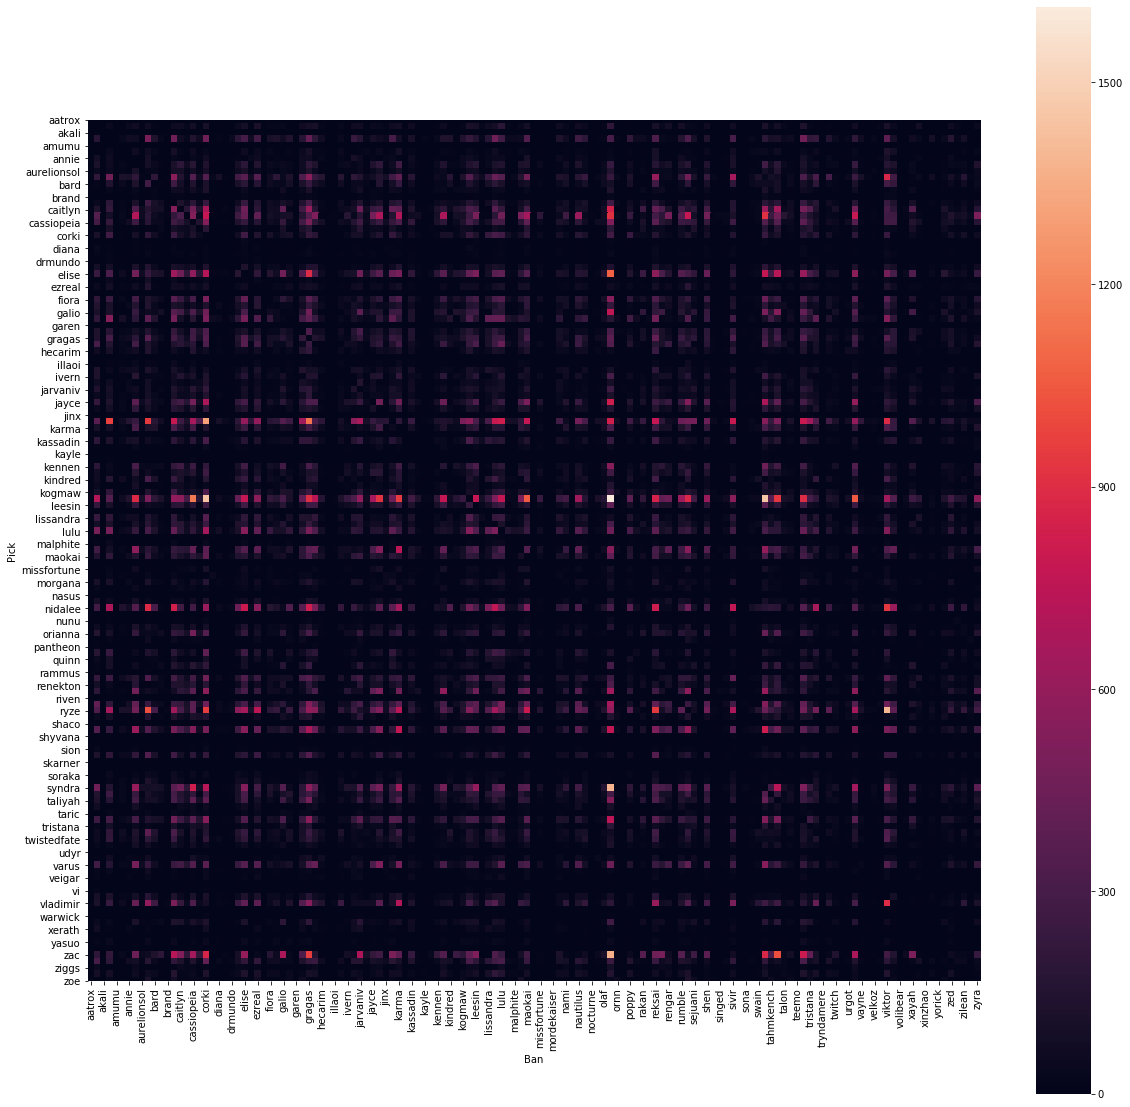

In [25]:
plt.figure(figsize=(20,20))

sns.heatmap(c, square=True,annot=False)


plt.xlabel("Ban")
plt.ylabel("Pick")
plt.show()


In [26]:
df_tempo3.head()

,Address,Ban,pick
0,http://matchhistory.na.leagueoflegends.com/en/...,rumble,irelia
1,http://matchhistory.na.leagueoflegends.com/en/...,rumble,reksai
2,http://matchhistory.na.leagueoflegends.com/en/...,rumble,ahri
3,http://matchhistory.na.leagueoflegends.com/en/...,rumble,ahri
4,http://matchhistory.na.leagueoflegends.com/en/...,rumble,jinx


In [27]:
df_test = pd.DataFrame()
df_test_tt = pd.DataFrame()

In [28]:
for i in df_tempo3.Ban.unique():
    df_test[i] = df_tempo3[df_tempo3.Ban == i].pick.value_counts(normalize = True)
    

In [29]:
for i in df_tempo3.Ban.unique():
    df_test_tt[i] = df_tempo3[df_tempo3.Ban == i].pick.value_counts(normalize = False)
    

In [30]:
df_test = df_test.fillna(0)

In [68]:
df_test.head()

,rumble,kassadin,lissandra,sivir,jarvaniv,annie,irelia,pantheon,leesin,janna,...,akali,shaco,jinx,yorick,volibear,ornn,zoe,amumu,xinzhao,garen
orianna,0.036420,0.027576,0.008786,0.011069,0.041667,0.011667,0.017949,0.026882,0.039525,0.027881,...,0.055556,0.000000,0.036036,0.016667,0.000000,0.010965,0.016927,0.166667,0.000000,0.083333
gragas,0.029314,0.024915,0.016925,0.037250,0.031332,0.025833,0.017521,0.002688,0.025019,0.021066,...,0.027778,0.000000,0.029279,0.016667,0.083333,0.007675,0.002604,0.000000,0.000000,0.000000
syndra,0.029258,0.018384,0.004522,0.009579,0.030512,0.000833,0.007265,0.016129,0.035923,0.022924,...,0.074074,0.000000,0.009009,0.100000,0.000000,0.002193,0.005208,0.000000,0.055556,0.000000
lulu,0.027426,0.020440,0.031008,0.014581,0.016240,0.019167,0.013675,0.016129,0.024533,0.026332,...,0.027778,0.027778,0.036036,0.041667,0.000000,0.002193,0.001953,0.000000,0.000000,0.000000
corki,0.025261,0.036647,0.044832,0.022989,0.034121,0.031250,0.015385,0.029570,0.025506,0.041512,...,0.046296,0.000000,0.027027,0.016667,0.000000,0.004386,0.015625,0.000000,0.000000,0.083333


In [95]:
df_test.iloc[13].sort_values(ascending=False).head(1).values[0]*100/df_test.iloc[13].sort_values(ascending=False).sum()

6.004945416309296

In [96]:
df_test.iloc[13].sort_values(ascending=False)

amumu           0.166667
garen           0.083333
kayn            0.055556
orianna         0.046845
urgot           0.039524
                  ...   
malphite        0.000000
volibear        0.000000
kayle           0.000000
skarner         0.000000
fiddlesticks    0.000000
Name: cassiopeia, Length: 136, dtype: float64

In [102]:
df_test_tt.loc["cassiopeia"].sort_values(ascending=False)

leblanc       1163.0
syndra         828.0
kalista        664.0
zac            658.0
elise          580.0
               ...  
lux              0.0
cassiopeia       0.0
skarner          0.0
nocturne         0.0
quinn            0.0
Name: cassiopeia, Length: 136, dtype: float64

In [33]:
df_test.max().sort_values(ascending=False)[0]

0.16666666666666666

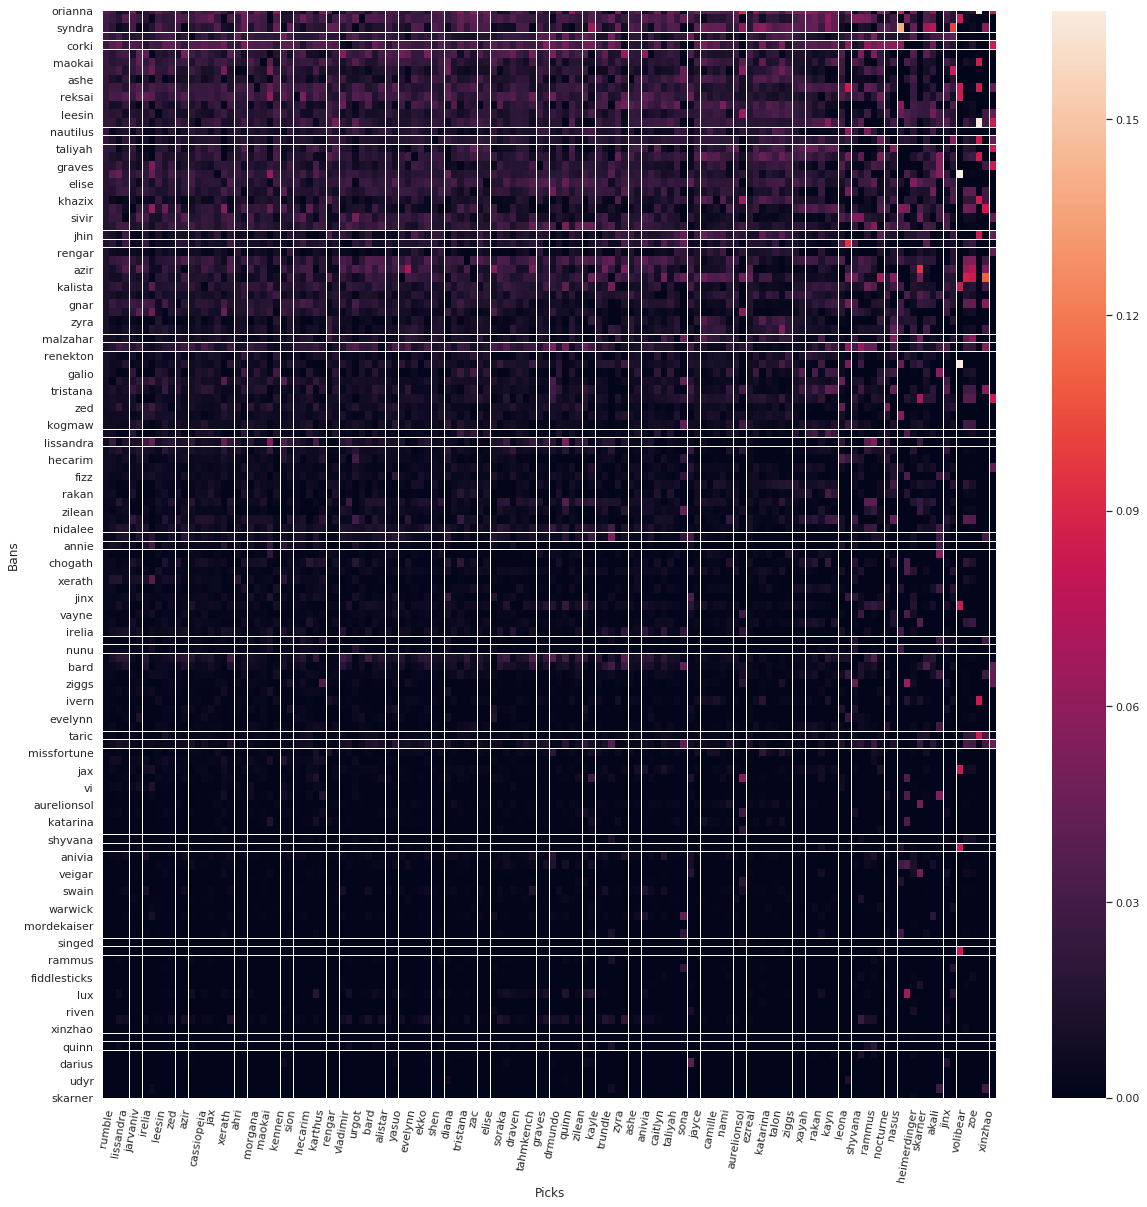

In [107]:
plt.figure(figsize=(20,20))

sns.heatmap(df_test,linewidths=0.001)

plt.xlabel("Picks")
plt.xticks(rotation=80)
plt.ylabel("Bans")
plt.show()


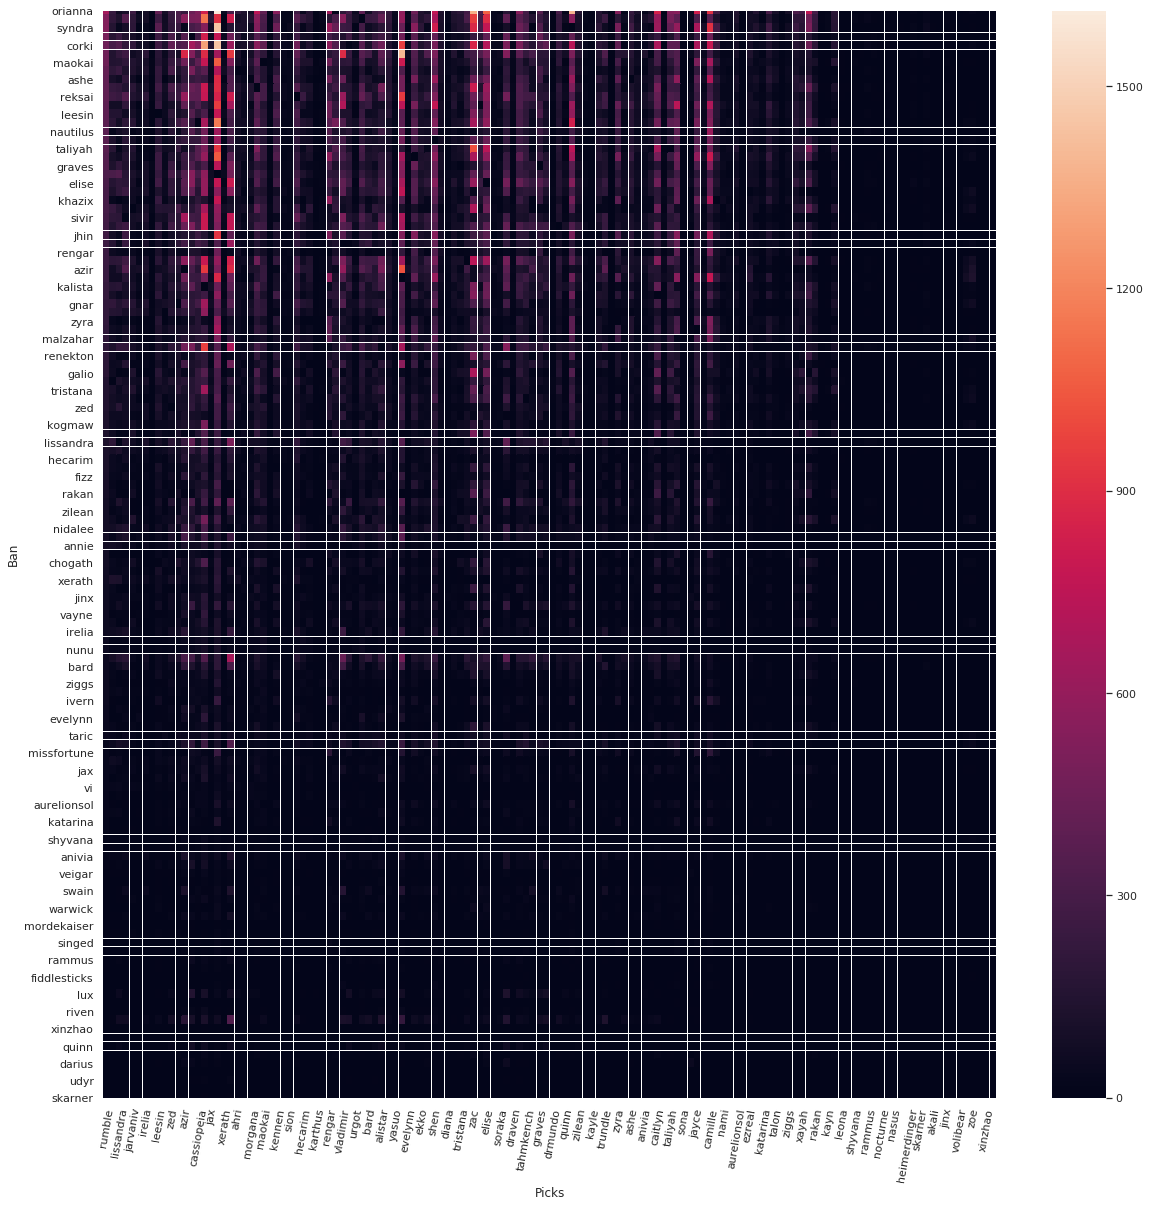

In [108]:
plt.figure(figsize=(20,20))

sns.heatmap(df_test_tt,linewidths=0.001)

plt.xlabel("Picks")
plt.xticks(rotation=80)
plt.ylabel("Ban")
plt.show()


In [58]:
df_test

,rumble,kassadin,lissandra,sivir,jarvaniv,annie,irelia,pantheon,leesin,janna,...,akali,shaco,jinx,yorick,volibear,ornn,zoe,amumu,xinzhao,garen
orianna,0.036420,0.027576,0.008786,0.011069,0.041667,0.011667,0.017949,0.026882,0.039525,0.027881,...,0.055556,0.000000,0.036036,0.016667,0.000000,0.010965,0.016927,0.166667,0.000000,0.083333
gragas,0.029314,0.024915,0.016925,0.037250,0.031332,0.025833,0.017521,0.002688,0.025019,0.021066,...,0.027778,0.000000,0.029279,0.016667,0.083333,0.007675,0.002604,0.000000,0.000000,0.000000
syndra,0.029258,0.018384,0.004522,0.009579,0.030512,0.000833,0.007265,0.016129,0.035923,0.022924,...,0.074074,0.000000,0.009009,0.100000,0.000000,0.002193,0.005208,0.000000,0.055556,0.000000
lulu,0.027426,0.020440,0.031008,0.014581,0.016240,0.019167,0.013675,0.016129,0.024533,0.026332,...,0.027778,0.027778,0.036036,0.041667,0.000000,0.002193,0.001953,0.000000,0.000000,0.000000
corki,0.025261,0.036647,0.044832,0.022989,0.034121,0.031250,0.015385,0.029570,0.025506,0.041512,...,0.046296,0.000000,0.027027,0.016667,0.000000,0.004386,0.015625,0.000000,0.000000,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
darius,0.000111,0.000000,0.000129,0.000000,0.000000,0.000417,0.000214,0.000000,0.000779,0.000000,...,0.000000,0.000000,0.015766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
monkeyking,0.000111,0.000242,0.000000,0.000106,0.000164,0.000000,0.000214,0.000000,0.000097,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
udyr,0.000056,0.000000,0.000258,0.000000,0.000000,0.001250,0.000000,0.000000,0.000000,0.000310,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
aatrox,0.000056,0.000000,0.000000,0.000000,0.000164,0.000000,0.000427,0.005376,0.000195,0.000620,...,0.000000,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000


In [65]:
df.iloc[2].sort_values(ascending=False).head(20)

varus           1.000000
kayle           1.000000
khazix          1.000000
camille         1.000000
ashe            1.000000
fiddlesticks    1.000000
sion            1.000000
akali           1.000000
brand           1.000000
yorick          1.000000
tahmkench       1.000000
shen            1.000000
ekko            1.000000
katarina        1.000000
jhin            0.979592
rengar          0.971429
kled            0.918919
zyra            0.918561
kayn            0.909091
leesin          0.908867
Name: syndra, dtype: float64

In [35]:
from sklearn import preprocessing

x = df_test.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

df = pd.DataFrame(x_scaled)
df.columns = df_test.columns
df.index = df_test.index

In [36]:
df.head()

,rumble,kassadin,lissandra,sivir,jarvaniv,annie,irelia,pantheon,leesin,janna,...,akali,shaco,jinx,yorick,volibear,ornn,zoe,amumu,xinzhao,garen
orianna,1.000000,0.730769,0.195965,0.297143,1.000000,0.266667,0.432990,0.434783,1.000000,0.616438,...,0.750,0.0,0.888889,0.166667,0.0,0.1250,0.204724,1.0,0.0,1.0
gragas,0.804580,0.660256,0.377522,1.000000,0.751969,0.590476,0.422680,0.043478,0.633005,0.465753,...,0.375,0.0,0.722222,0.166667,0.5,0.0875,0.031496,0.0,0.0,0.0
syndra,0.803053,0.487179,0.100865,0.257143,0.732283,0.019048,0.175258,0.260870,0.908867,0.506849,...,1.000,0.0,0.222222,1.000000,0.0,0.0250,0.062992,0.0,0.5,0.0
lulu,0.752672,0.541667,0.691643,0.391429,0.389764,0.438095,0.329897,0.260870,0.620690,0.582192,...,0.375,0.5,0.888889,0.416667,0.0,0.0250,0.023622,0.0,0.0,0.0
corki,0.693130,0.971154,1.000000,0.617143,0.818898,0.714286,0.371134,0.478261,0.645320,0.917808,...,0.625,0.0,0.666667,0.166667,0.0,0.0500,0.188976,0.0,0.0,1.0


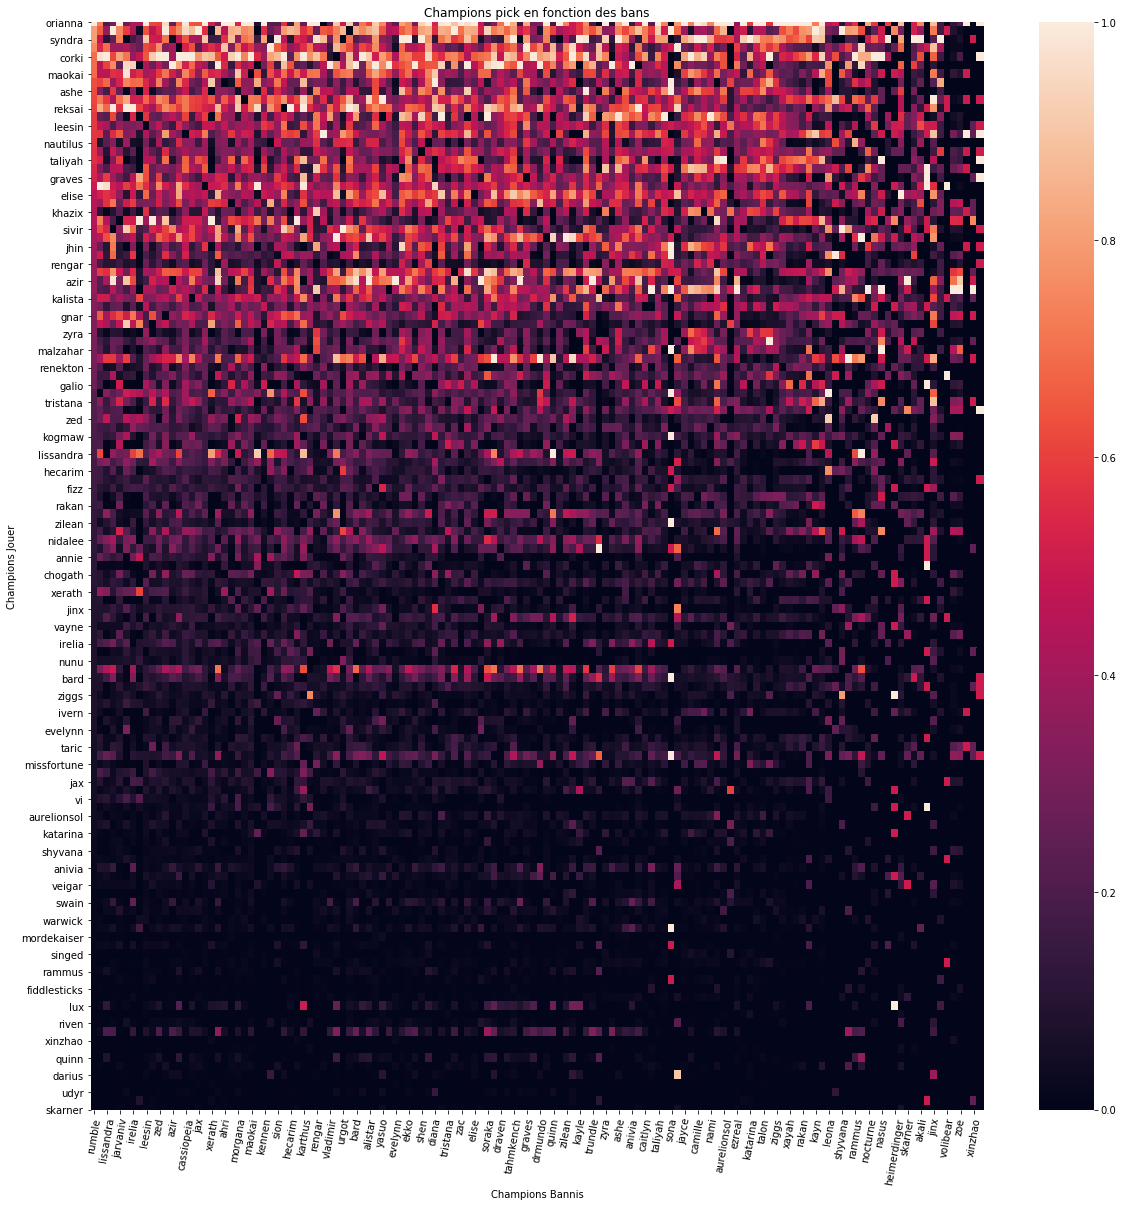

In [37]:
plt.figure(figsize=(20,20))

# sns.set(rc={'figure.figsize':(20,20)})

sns.heatmap(df,annot=False)
plt.title("Champions pick en fonction des bans")

plt.xlabel("Champions Bannis")
plt.xticks(rotation=80)

plt.ylabel("Champions Jouer")
plt.show()


In [38]:
df_test_tt = df_test_tt.fillna(0)

In [39]:
df_test_tt

,rumble,kassadin,lissandra,sivir,jarvaniv,annie,irelia,pantheon,leesin,janna,...,akali,shaco,jinx,yorick,volibear,ornn,zoe,amumu,xinzhao,garen
orianna,656,228.0,68.0,104.0,254.0,28.0,84.0,10.0,406.0,90.0,...,6.0,0.0,16.0,2.0,0.0,10.0,26.0,2.0,0.0,2.0
gragas,528,206.0,131.0,350.0,191.0,62.0,82.0,1.0,257.0,68.0,...,3.0,0.0,13.0,2.0,1.0,7.0,4.0,0.0,0.0,0.0
syndra,527,152.0,35.0,90.0,186.0,2.0,34.0,6.0,369.0,74.0,...,8.0,0.0,4.0,12.0,0.0,2.0,8.0,0.0,2.0,0.0
lulu,494,169.0,240.0,137.0,99.0,46.0,64.0,6.0,252.0,85.0,...,3.0,1.0,16.0,5.0,0.0,2.0,3.0,0.0,0.0,0.0
corki,455,303.0,347.0,216.0,208.0,75.0,72.0,11.0,262.0,134.0,...,5.0,0.0,12.0,2.0,0.0,4.0,24.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
darius,2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,8.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
monkeyking,2,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
udyr,1,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aatrox,1,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [40]:
normalized_df = (df_test_tt-df_test_tt.mean())/df_test_tt.std()

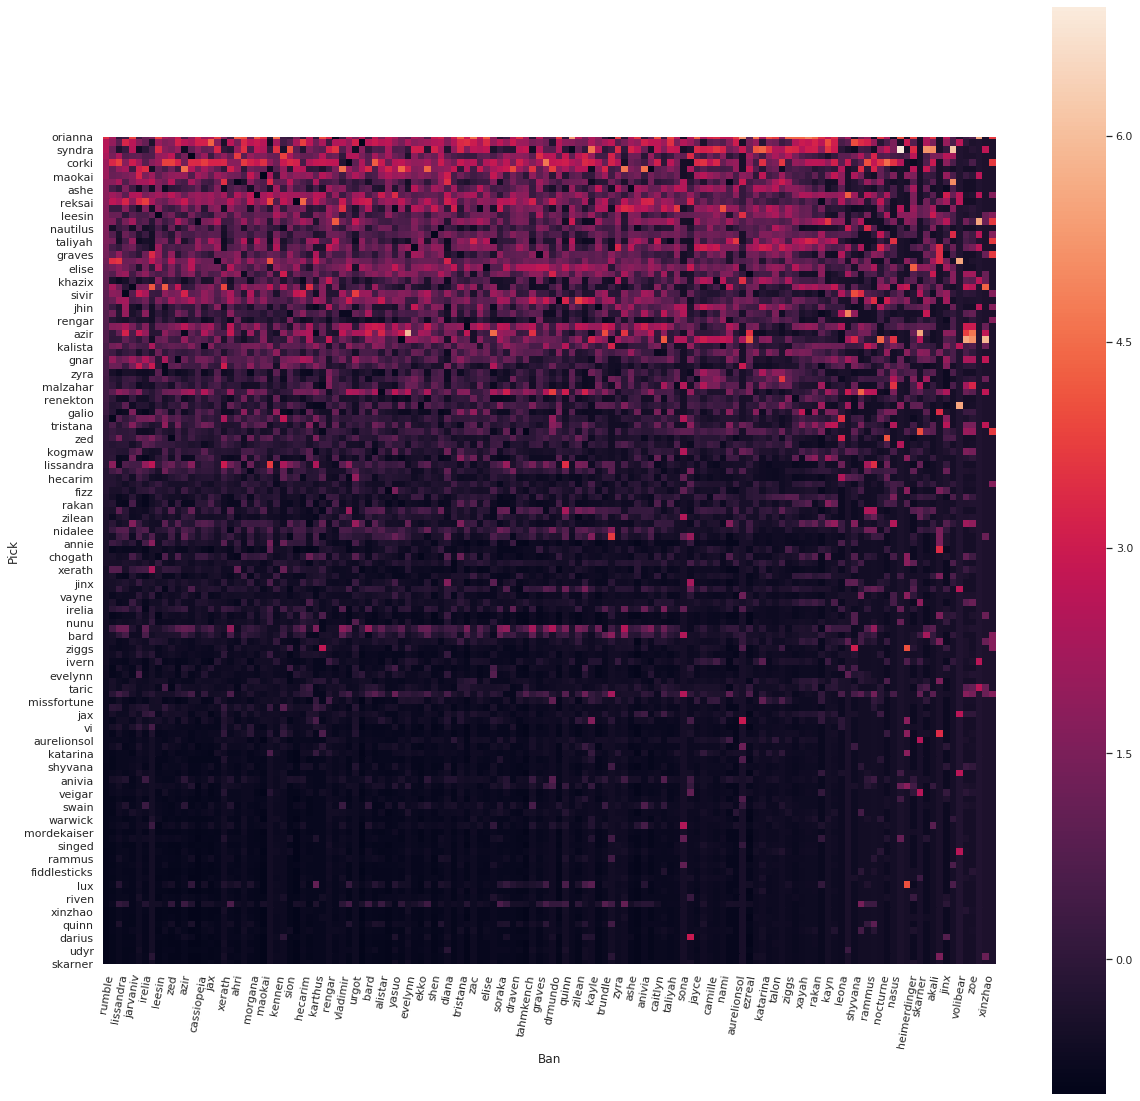

In [41]:
plt.figure(figsize=(20,20))

sns.set(rc={'figure.figsize':(20,20)})

sns.heatmap(normalized_df,square=True,annot=False)

plt.xlabel("Ban")
plt.xticks(rotation=80)

plt.ylabel("Pick")
plt.show()


In [42]:
normalized_df = (df_test_tt-df_test_tt.min())/(df_test_tt.max()-df_test_tt.min())


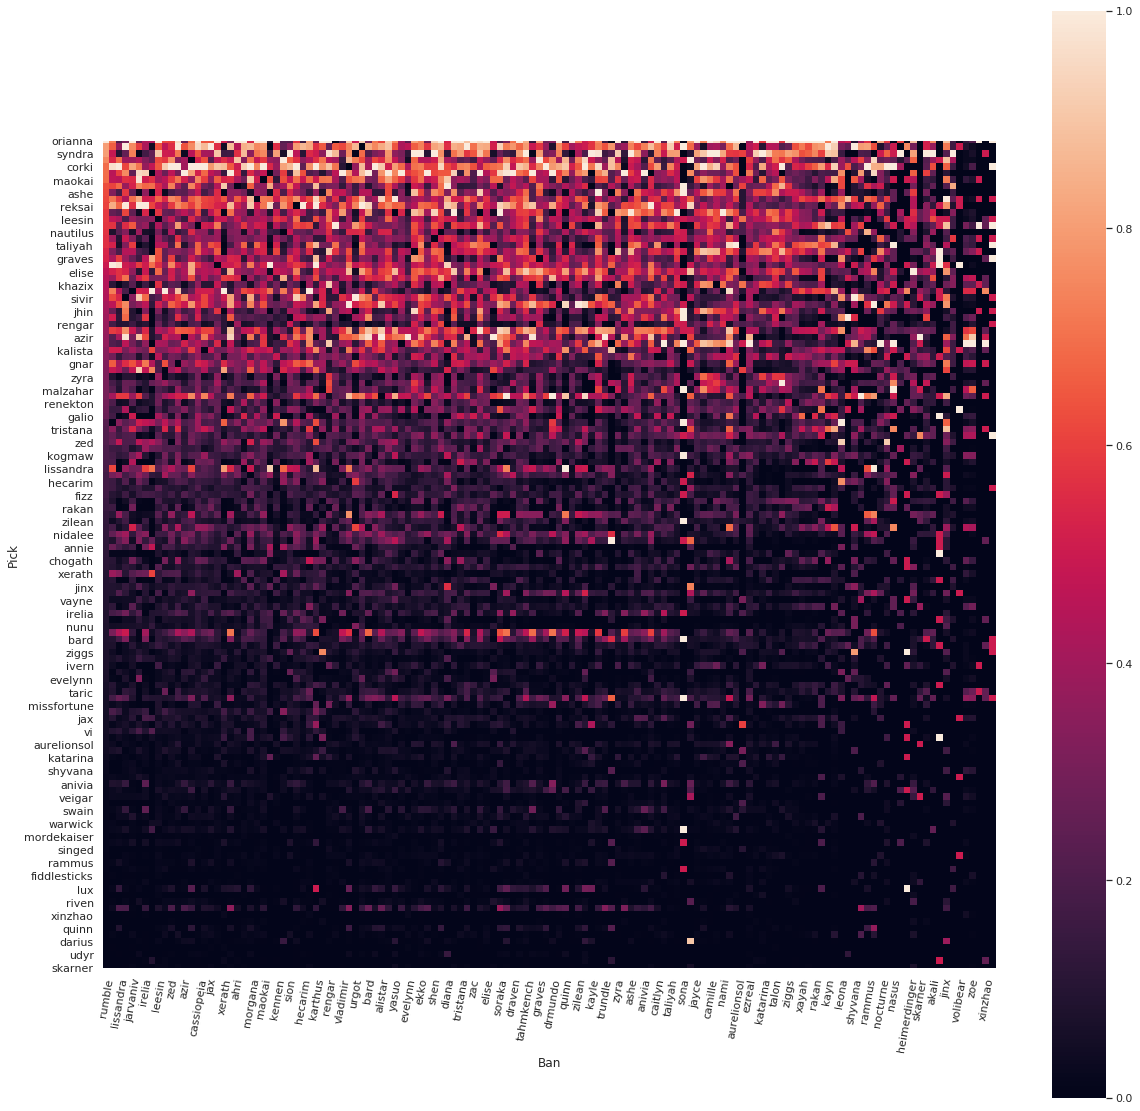

In [43]:
plt.figure(figsize=(20,20))

sns.set(rc={'figure.figsize':(20,20)})

sns.heatmap(normalized_df,square=True,annot=False)

plt.xlabel("Ban")
plt.xticks(rotation=80)

plt.ylabel("Pick")
plt.show()


In [44]:
#Heatmap par saison

In [45]:
df_tempo3

,Address,Ban,pick
0,http://matchhistory.na.leagueoflegends.com/en/...,rumble,irelia
1,http://matchhistory.na.leagueoflegends.com/en/...,rumble,reksai
2,http://matchhistory.na.leagueoflegends.com/en/...,rumble,ahri
3,http://matchhistory.na.leagueoflegends.com/en/...,rumble,ahri
4,http://matchhistory.na.leagueoflegends.com/en/...,rumble,jinx
...,...,...,...
1097275,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,jarvaniv
1097276,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,malzahar
1097277,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,malzahar
1097278,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,vayne


In [46]:
df_tempo3 = df_tempo3.merge(df_date, right_on="Address",left_on="Address",how='left')


In [47]:
df_tempo3

,Address,Ban,pick,Date
0,http://matchhistory.na.leagueoflegends.com/en/...,rumble,irelia,1/24/2015
1,http://matchhistory.na.leagueoflegends.com/en/...,rumble,reksai,1/24/2015
2,http://matchhistory.na.leagueoflegends.com/en/...,rumble,ahri,1/24/2015
3,http://matchhistory.na.leagueoflegends.com/en/...,rumble,ahri,1/24/2015
4,http://matchhistory.na.leagueoflegends.com/en/...,rumble,jinx,1/24/2015
...,...,...,...,...
894091,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,jarvaniv,1/28/2018
894092,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,malzahar,1/28/2018
894093,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,malzahar,1/28/2018
894094,https://matchhistory.na.leagueoflegends.com/en...,kogmaw,vayne,1/28/2018


In [48]:
# df_tempo3=df_tempo3.drop(columns="Date_y")
df_tempo3.columns = ["Address","Ban","pick","Date"]
df_tempo3.Date = pd.to_datetime(df_tempo3.Date)


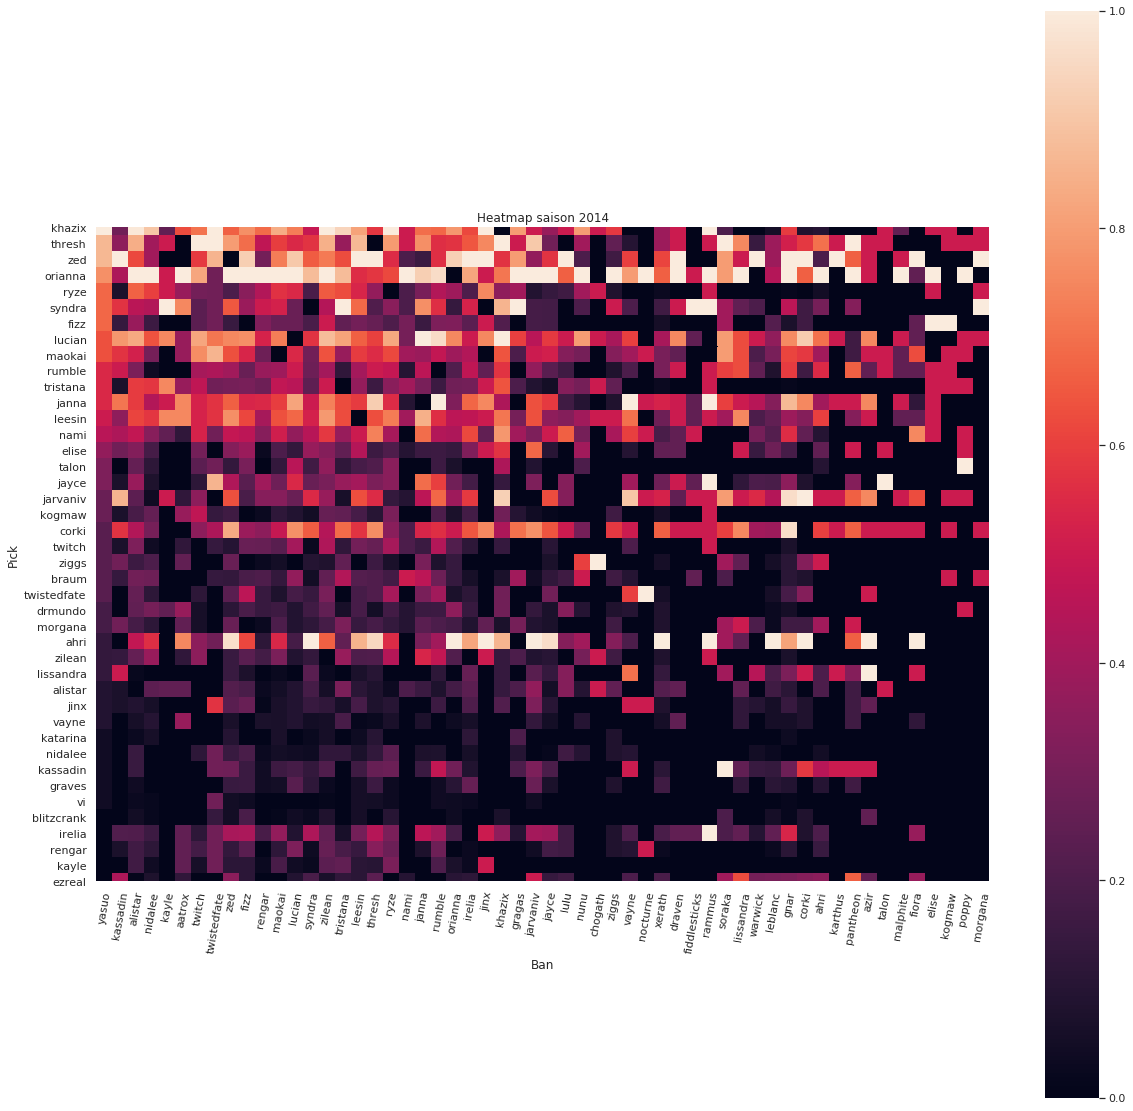

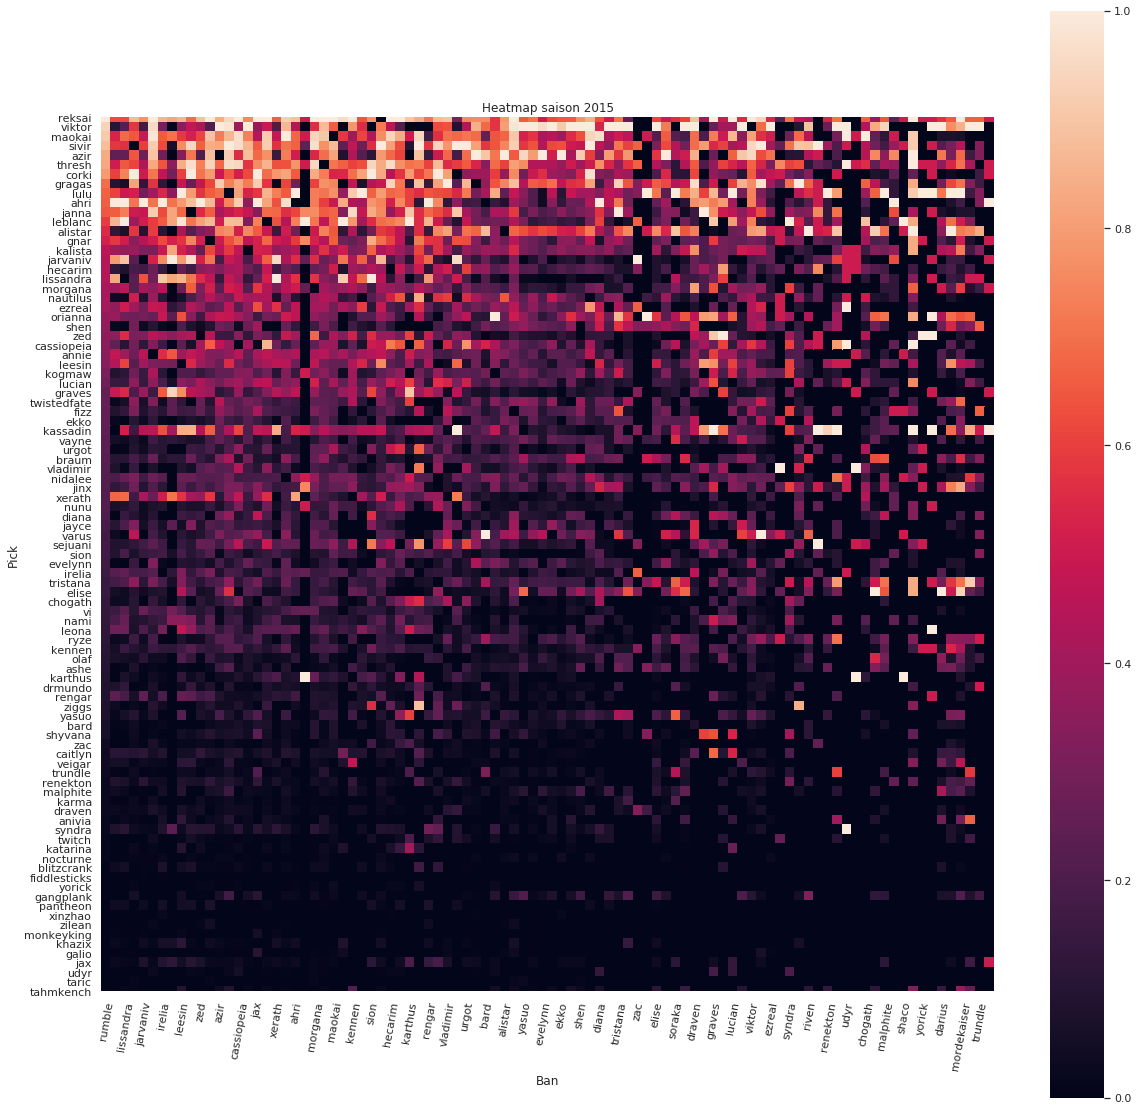

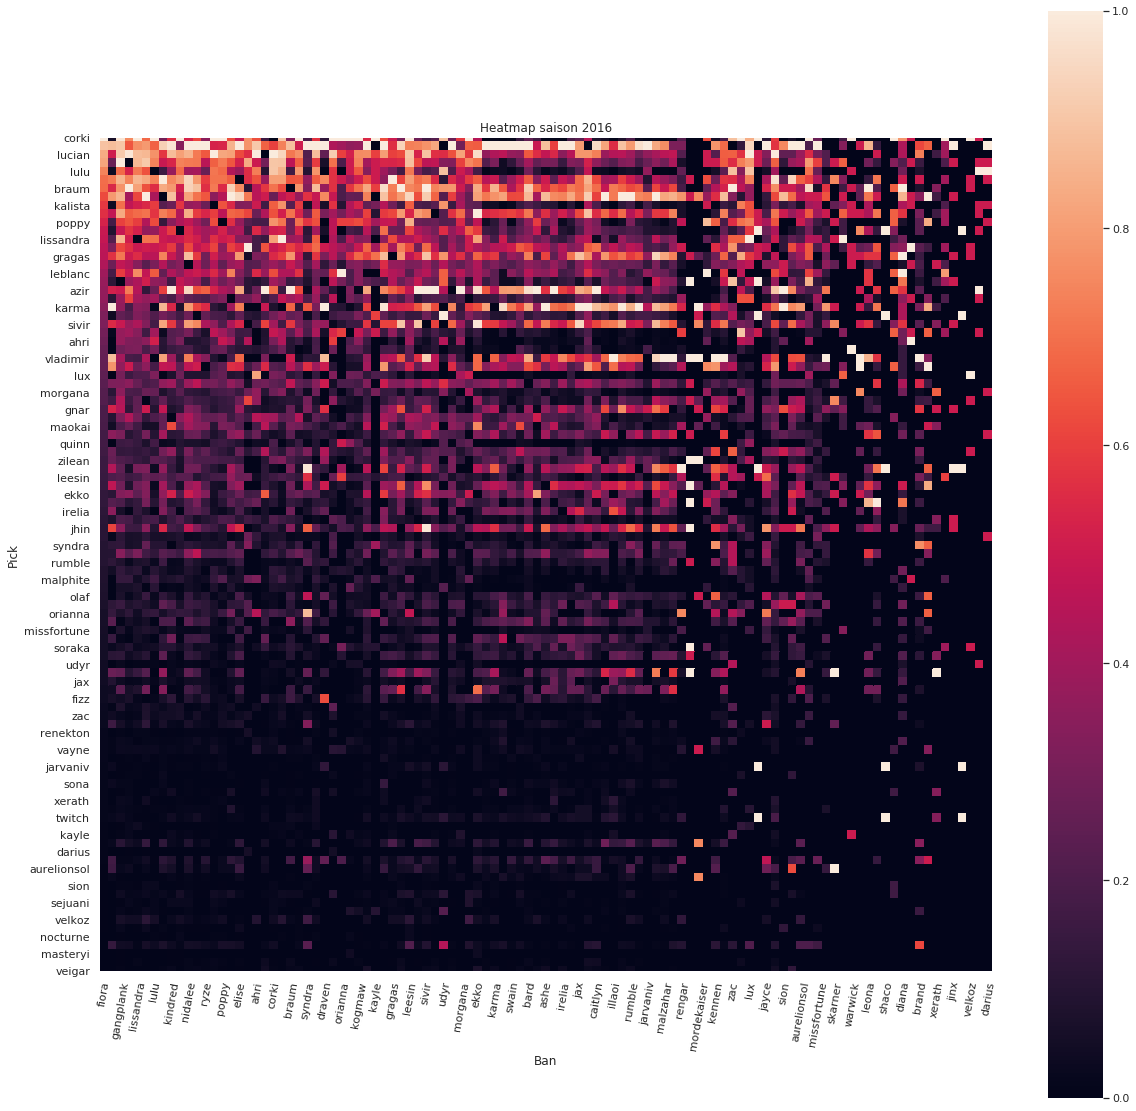

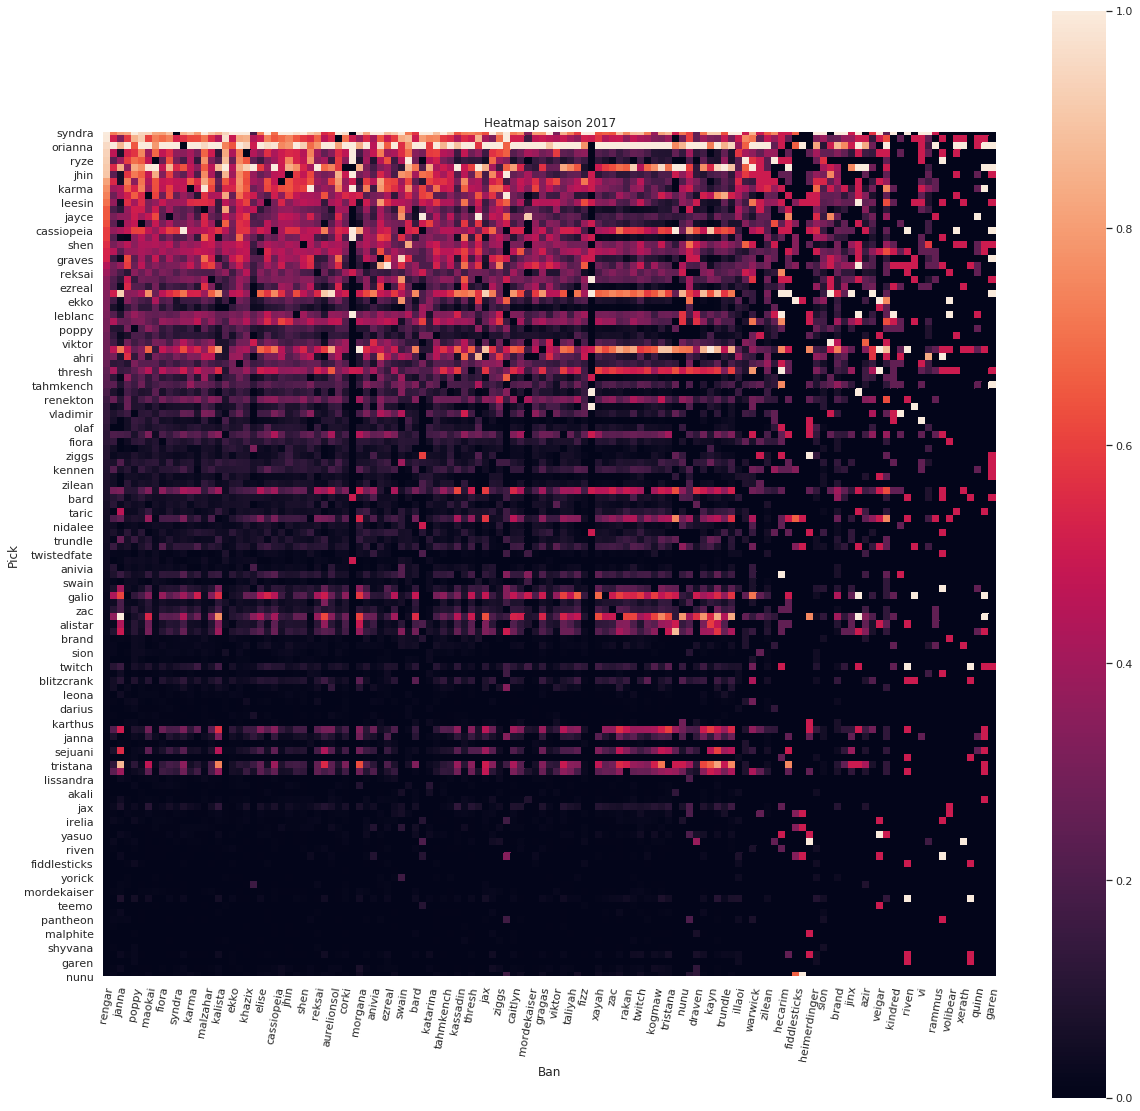

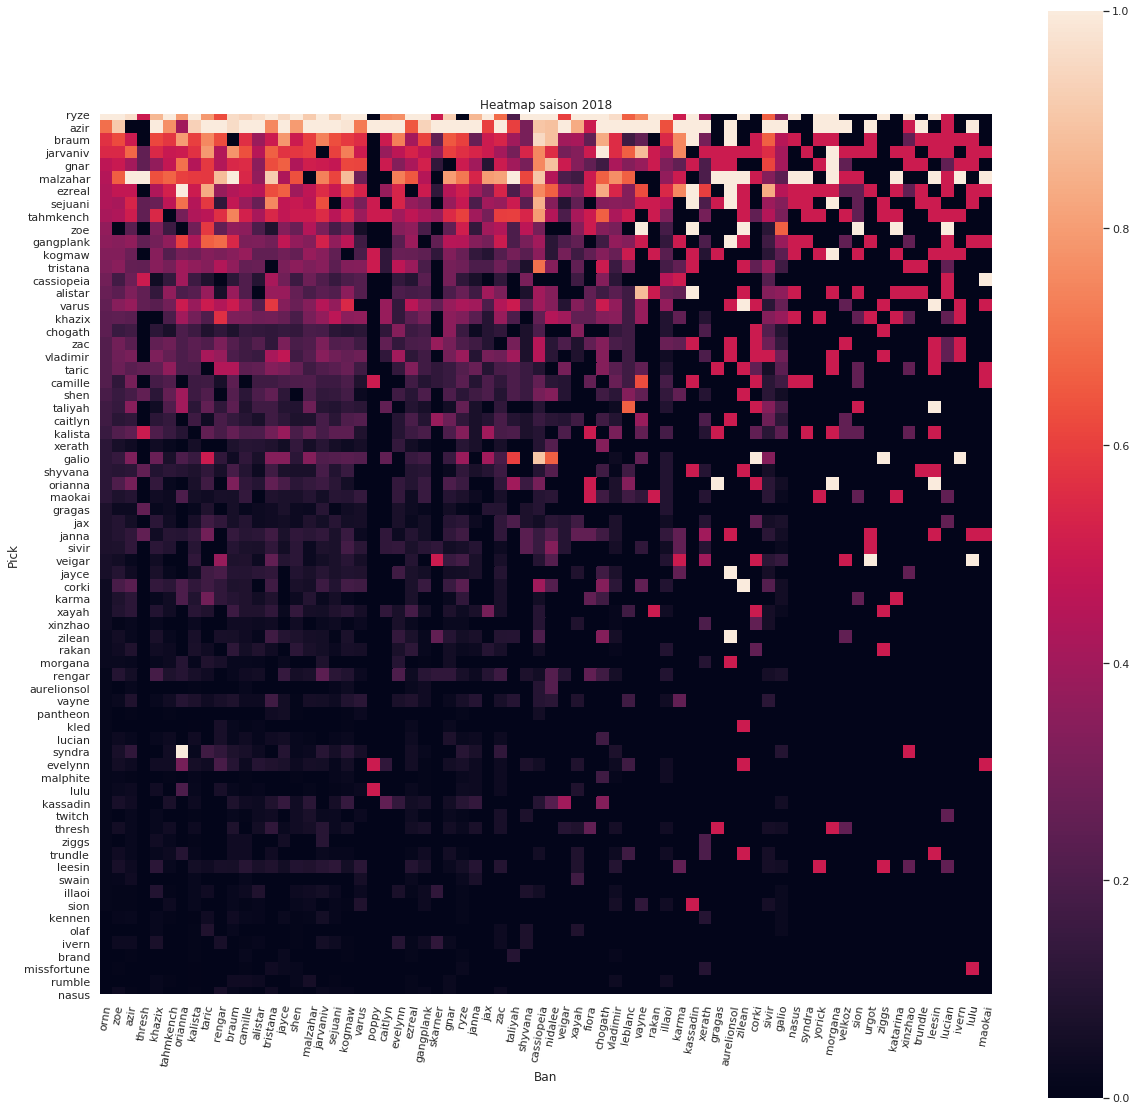

In [49]:

for année in [2014,2015,2016,2017,2018]:

    df_test_tt_saison = pd.DataFrame()
    df_tt_pi = df_tempo3[df_tempo3.Date.dt.year == année]
    
    for i in df_tt_pi.Ban.unique():
        
        df_test_tt_saison[i] = df_tt_pi[df_tt_pi.Ban == i].pick.value_counts(normalize = False)
        

    df_test_tt_saison = df_test_tt_saison.fillna(0)
    normalized_df = (df_test_tt_saison-df_test_tt_saison.min())/(df_test_tt_saison.max()-df_test_tt_saison.min())

    
    plt.figure(figsize=(20,20))
    plt.title("Heatmap saison {}".format(année))
    sns.set(rc={'figure.figsize':(20,20)})

    sns.heatmap(normalized_df,square=True,annot=False)

    plt.xlabel("Ban")
    plt.xticks(rotation=80)
    plt.ylabel("Pick")
    
    plt.show()
